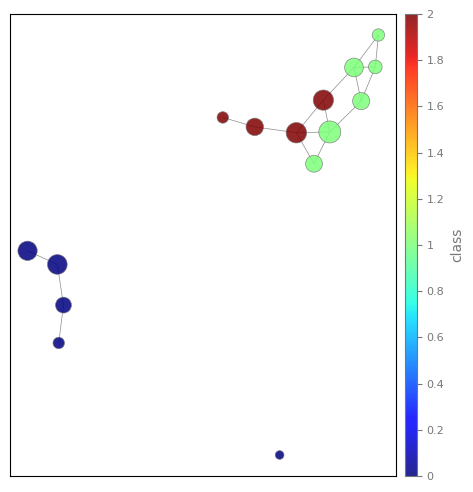

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

from mapper.core import *
from mapper.cover import *
from mapper.clustering import *
from mapper.plot import *

import matplotlib

iris_data = load_iris()
X, y = iris_data.data, iris_data.target
lens = PCA(2).fit_transform(X)

mapper_algo = MapperAlgorithm(cover=CubicCover(n=10, perc=0.5), clustering=AgglomerativeClustering(n_clusters=None, linkage='single'))
mapper_graph = mapper_algo.fit_transform(X, lens)
mapper_plot = MapperPlot(X, mapper_graph)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
colored = mapper_plot.with_colors(colors=list(y), agg=np.nanmedian)
colored.plot_static(title='class', ax=ax)



In [2]:

colored.plot_interactive_2d(title='class', width=512, height=512)

In [3]:
colored.plot_interactive_3d(title='class', width=512, height=512)

In [7]:

from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA

from mapper.core import *
from mapper.cover import *
from mapper.clustering import *
from mapper.plot import *

import matplotlib

digits = load_digits()
X, y = [np.array(x) for x in digits.data], digits.target
lens = PCA(2).fit_transform(X)

mapper_algo = MapperAlgorithm(cover=CubicCover(n=10, perc=0.25), clustering=KMeans(10, n_init='auto'))
mapper_graph = mapper_algo.fit_transform(X, lens)

mapper_classifier = MapperClassifier(mapper_algo)
ccs = mapper_classifier.fit_predict(X, lens)
print(len(set(ccs)))


1


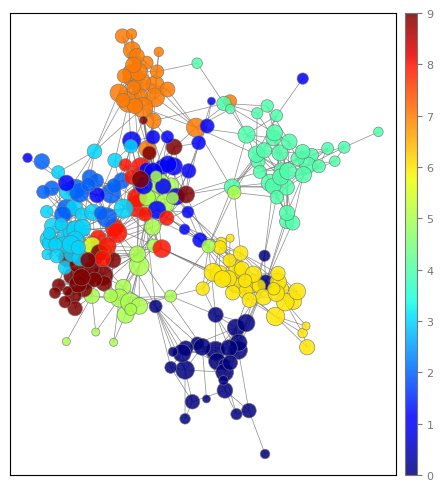

In [8]:

mapper_plot = MapperPlot(X, mapper_graph, iterations=100)

fig1, ax1 = plt.subplots(1, 1, figsize=(6, 6))
mapper_plot.with_colors(colors=y, cmap='jet', agg=np.nanmedian).plot_static(ax=ax1)


In [9]:

mapper_plot.with_colors(colors=y, cmap='jet', agg=np.nanmedian).plot_interactive_2d(width=512, height=512)

In [10]:
mapper_plot.with_colors(colors=y, cmap='jet', agg=np.nanmedian).plot_interactive_3d(width=512, height=512)